# CIFAR-10 チュートリアル[付録]

ここでは本論で言及できなかった点について幾つかまとめてみます。

## 付録A: データの保存&読み込み

### A.1テストデータのチェック

本論ではdltパッケージを用いてテストデータとの比較、その分類の精度についてまとめました。ここでは、本論で保存した`my_model.h5`ファイルを用いてどういうことができるかを紹介したいと思います。

まず`save_model('my_model.h5')`をCIFAR-10のソースコード (ここで扱ったものでなくても構いません) に追加して実行します。このあと`my_model.h5`というファイルが同じディレクトリに保存されるかと思います。その後以下を実行すると、テストデータの画像に対する分類の結果やその精度が得られます。

☆テスト画像: cat


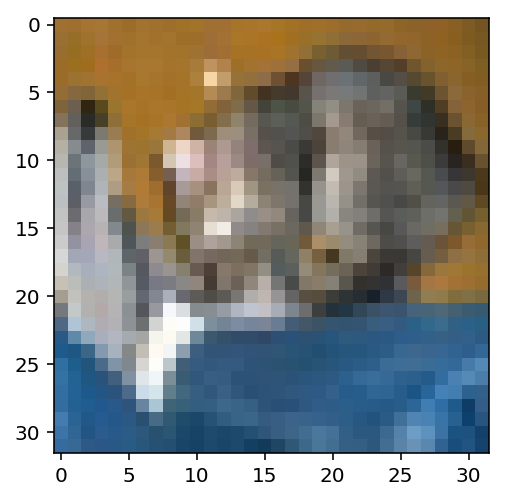

0 - 分類されたものはcatです。精度は96.48%です。

################################################
☆テスト画像: ship


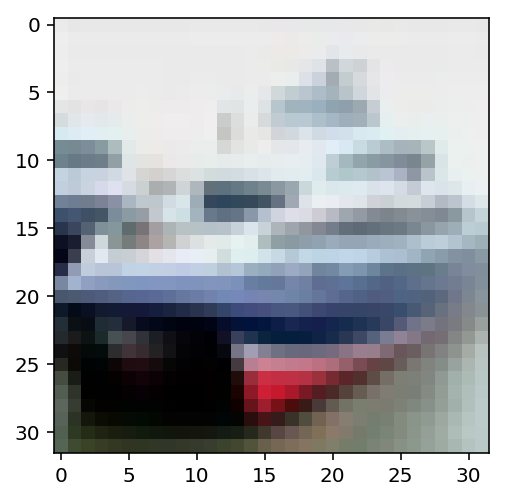

1 - 分類されたものはshipです。精度は89.41%です。

################################################
☆テスト画像: ship


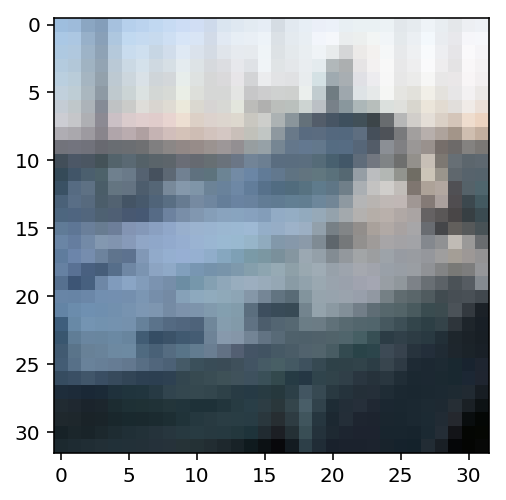

2 - 分類されたものはshipです。精度は97.97%です。

################################################
☆テスト画像: airplane


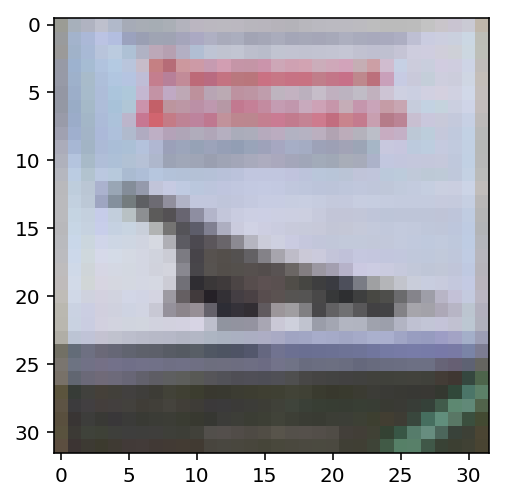

3 - 分類されたものはairplaneです。精度は75.65%です。

################################################
☆テスト画像: frog


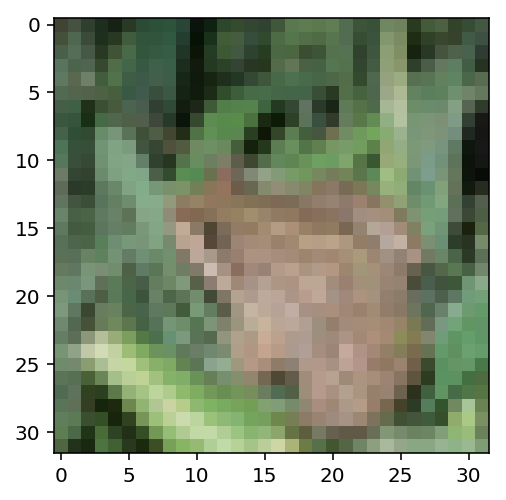

4 - 分類されたものはfrogです。精度は97.14%です。

################################################


In [6]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.np_utils import to_categorical
import numpy as np
import os
import matplotlib.pyplot as plt

import dlt

    ## CIFAR-10公式ラベル
cifar10_labels = np.array([
                'airplane',
                'automobile',
                'bird',
                'cat',
                'deer',
                'dog',
                'frog',
                'horse',
                'ship',
                'truck']
                )

def plot_image(X, label=None):
    print('☆テスト画像 (正解ラベル) : %s' % label)
    plt.imshow(X)
    plt.show()
    plt.clf()

if __name__=='__main__':
    # import data
    data = dlt.cifar.load_cifar10()
    X_train = data.train_images.reshape([-1, 32, 32, 3])
    X_test = data.test_images.reshape([-1, 32, 32, 3])
    X_train = data.train_images.astype('float32') / 255
    X_test = data.test_images.astype('float32') / 255

    # load model
    model = load_model(os.path.join('results', 'my_model.h5')) # 保存したモデルから読み込む

    # output
    n = 5
    preds = model.predict(X_test) # modelは学習させたもの
    cls= model.predict_classes(X_test)
    for i in range(n):
        true_label = cls[i]
        labels = cifar10_labels[true_label]
        plot_image(X_test[i], labels)
        print('{0} - 分類されたものは{1}です。精度は{2:.2f}%です。\n' .format(i, labels, preds[i][true_label]*100))
        print("################################################")

### A.3 任意の画像でチェック

ネットで拾ってきたような任意の画像でチェックしたいときは、以下のようにすればできます。ここでは
<img src='images/car.png'/>
from いらすとや

を使います。

In [2]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
import os

# CIFAR-10公式ラベル
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

def image_to_array(model, image_path):
    img = image.load_img(img_path, target_size=(32, 32)) #入力画像のサイズ
    x = image.img_to_array(img) # 画像データをnumpy.arrayへ変換
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    preds = model.predict(x) # modelは学習させたもの
    cls = model.predict_classes(x)

    return preds, cls

if __name__=='__main__':
    img_path = 'images/car.png' # 任意の画像
    model = load_model(os.path.join('results','my_model.h5')) # 保存したモデルから読み込む
    model_tl = load_model(os.path.join('results','my_model_tl.h5')) # 保存したモデルから読み込む


    _, cls = image_to_array(model, img_path)
    _, cls_tl = image_to_array(model_tl, img_path)

    true_cls = cls[0]
    true_cls_tl = cls_tl[0]

    print('分類されたものは{0}です。' .format(cifar10_labels[true_cls]))
    print('TL: 分類されたものは{0}です。' .format(cifar10_labels[true_cls_tl]))

分類されたものはairplaneです。
TL: 分類されたものはtruckです。


と得られます。本論で計算した方は正しく分類ができていないので、精度が低いようです。。。。

この方法はImageNet等のpretrainedモデルを使うとより幅広いカテゴリー分けができます。以下参照ください: [Applications on Keras](https://keras.io/ja/applications/)

## 付録B: 基本的なcallbacksの使い方例

### B.1 損失関数, 精度

ここまでは一つのコードで学習の実行&グラフの表示をしてきましたが、学習結果を保存し、後から読み込んでグラフを表示することができます。本論の問題を解いた方は`Earlystopping`という[callbacks](https://keras.io/ja/callbacks/)を使ったと思います。ここで`CSVLogger('history.csv')`を使ってみます。

コードを実行すると、`history.csv`ファイルが保存されます。このファイルには
```
epoch,acc,loss,val_acc,val_loss
0,0.38851111114819842,1.660481661966112,0.51759999999999995,1.3262438331604003
1,0.54308888895246721,1.2750055780834622,0.60319999999999996,1.1193507038116455
2,0.6129777777353923,1.0916920099788241,0.68000000000000005,0.92864536266326903
3,0.65393333343929716,0.97272546102735735,0.71540000000000004,0.82300713539123538
4,0.68602222224341503,0.89219131661521067,0.73939999999999995,0.76103409023284907
```
のように、`acc`, `loss`, `val_acc`, `val_loss`がそれぞれ保存されています(具体的な値は実行環境による)。これを読み出せばグラフにすることができますね。実際以下のようにすれば、可視化できます:
    

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

d = np.genfromtxt(os.path.join('appendix_results', 'history.csv'), delimiter=',', names=True)
fig, ax = plt.subplots(1)
ax.plot(d['epoch'], d['acc'], c='k')
ax.plot(d['epoch'], d['val_acc'], c='r')
ax.legend(('Train', 'Validation'))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
fig.savefig('history.png')

<img src='appendix_results/history.png'/>

となり、ちゃんとグラフが保存されたことがわかります。

本論で用いた`model.save('results/my_model.h5')`はモデル全体を保存するもので、後から学習結果を使うことができます。一方、`history.csv`には学習結果しか保存されていないので、その点の違いに注意しなければなりません。

特に`model.save`を使えば、学習させた後の重み等も保存することができます。このようにすれば、後からその結果を使うことが分かっている場合は、GPUでヘビーな計算をさせてモデルを保存しておけば、自前のコンピュータ上で負担をかけずにその結果を利用することができます。

### B2: Tensorboard出力

`callbacks`にいろいろ設定すれば、ログを取れることは、付録Aでみました。[Tensorboard](https://deepage.net/tensorflow/2017/04/25/tensorboard.html)に出力することもできます。

In [ ]:
tb = keras.callbacks.TensorBoard(
        log_dir='appendix_results/cifar10_tb', 
        histogram_freq=5, 
        write_graph=True, 
        write_images=False)

このコールバックを設定し、コードを実行すれば、`cifar10_tb/`以下にTensorboardのファイルができるので、`tensorboard --logdir=cifar10_tb/`とコマンドを打てば、ブラウザから以下のように読み取れるはずです。

<img src='appendix_results/acc_tb.png'/>
<img src='appendix_results/loss_tb.png'/>
<img src='appendix_results/val_acc_tb.png'/>
<img src='appendix_results/val_loss_tb.png'/>